# analysis of device AC (storage unit)

First I will set up the notebook. I will import the neccesary libraries, load in the file and create the needed functions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import glob
import statistics

In [2]:
df_AC = pd.read_excel('data/temp_data/data_AC.xlsx')

In [3]:
def getOutliers(df):
    #First step is to sort the dataset by temperature (ascending)
    sorted_df = sorted(df["Temp"])
    #Now we can split the dataset up into quartiles
    q1, q3= np.percentile(sorted_df,[25,75])
    #get iqr
    iqr = q3 - q1
    #determine the lower and upper bounds 
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr) 
    outliers = df.loc[((df["Temp"] > upper_bound) == True) | ((df["Temp"] < lower_bound) == True)]
    return outliers

### Start with the analysis
Let's start by creating a few graphs, to explore what the data looks like.

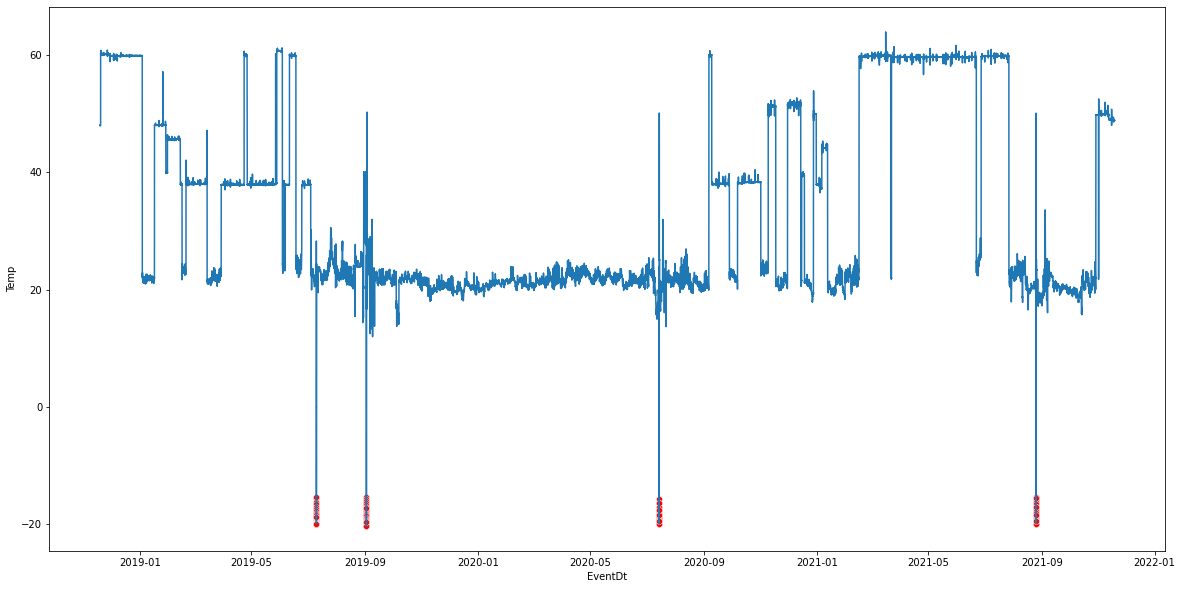

In [4]:
sns.lineplot(x="EventDt", y="Temp", data=df_AC)
sns.scatterplot(x="EventDt", y="Temp", data=getOutliers(df_AC), c=['r'])
plt.gcf().set_size_inches(20, 10)

As we can see, the temperature of the device is not consistent. There are a lot of times the temperature diverges from the average for a prolonged time. I don't imagine this being due to the device being broken or on maintenance. Rather, I think this is due to a change of purpose for the device. We will take a closer look at the most apparent time this happened, around june 2019.

In [5]:
#outliers = getOutliers(df_U)
#outliers.loc[(df_U['EventDt'] > "2021-03-01") & (df_U['EventDt'] <= "2021-07-01")]

Seems like the sections starts on March 29th and ends at June 4th. Let's plot this data now.

In [10]:
df_AC

,DeviceId,EventDt,Temp
0,AC,2018-11-18 17:07:06.263,48.02
1,AC,2018-11-18 17:12:05.693,48.03
2,AC,2018-11-18 17:17:06.207,48.02
3,AC,2018-11-18 17:22:05.713,48.05
4,AC,2018-11-18 17:27:05.683,48.03
...,...,...,...
327220,AC,2021-11-18 16:38:33.003,48.88
327221,AC,2021-11-18 16:43:33.050,48.88
327222,AC,2021-11-18 16:48:33.097,48.88
327223,AC,2021-11-18 16:53:33.000,48.89


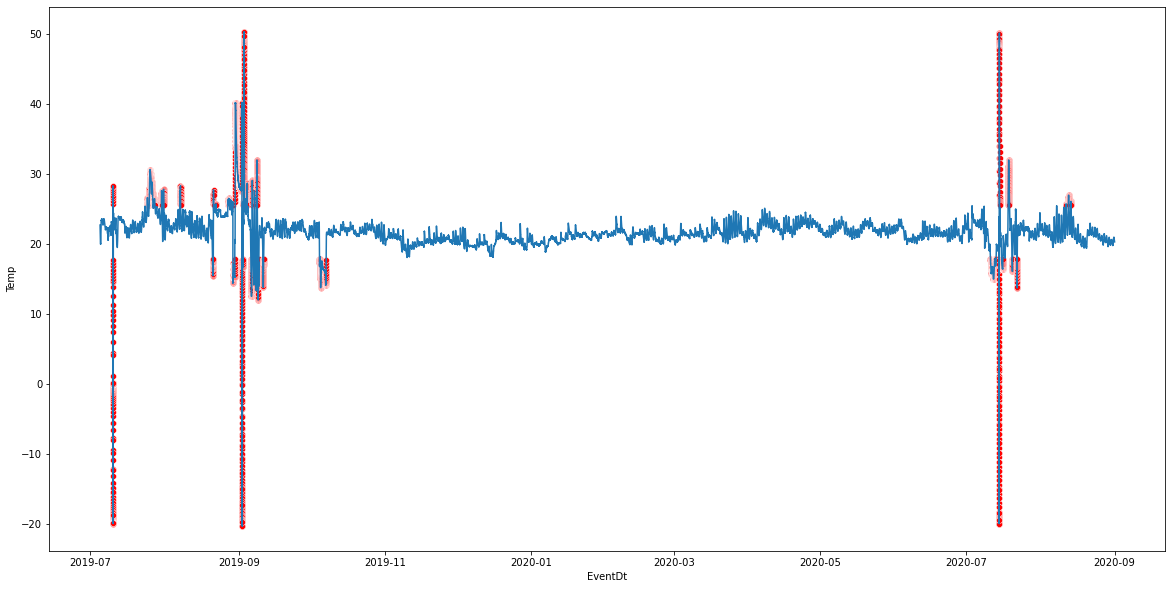

In [18]:
df_AC_Low = df_AC.loc[(df_AC["EventDt"] > "2019-07-05") & (df_AC["EventDt"] < "2020-09-01")]
sns.lineplot(data=df_AC_Low, x="EventDt", y="Temp", legend="full")
sns.scatterplot(x="EventDt", y="Temp", data=getOutliers(df_AC_Low), c=['r'])
plt.gcf().set_size_inches(20,10)

Let's zoom in some more at the last anomaly to see if we can spot a pattern before it happens.
